In [1]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter

import pandas as pd
import numpy as np #vektorler uzerinde islem yapmak icin

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pydot

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy 
import seaborn as sns
import itertools
import collections
import nltk
import networkx
import warnings
from textblob import TextBlob

In [2]:
data = pd.read_csv("vaccineTweets.csv",error_bad_lines=False)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_url(text): 
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)
 # converting return value from list to string



def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower()




In [3]:
new_data = data['text'].apply(remove_emoji)
new_data = data['text'].apply(remove_url)
new_data = data['text'].apply(clean_text)

new_data = pd.DataFrame(data=new_data,dtype=object)


def get_subjectivity(text):
    return TextBlob(text).sentiment.polarity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

new_data['Subjectivity'] = new_data['text'].apply(get_subjectivity)
new_data['Polarity'] = new_data['text'].apply(get_polarity)

In [4]:
new_data.head(50)

,text,Subjectivity,Polarity
0,australia manufacture covid19 vaccine and give...,0.400000,0.400000
1,coronavirusvaccine coronavaccine covidvaccine ...,0.910000,0.910000
2,deaths due covid19 affected countries read mor...,0.187500,0.187500
3,teamsubhashree subhashreesotwe iamrajchoco sta...,0.500000,0.500000
4,michellegrattan conversationedu this what pass...,0.000000,0.000000
5,the multisystem inflammatory syndromechildren ...,0.000000,0.000000
6,privilrodrigues yatish57 deepkaranahuja shrist...,0.000000,0.000000
7,msnbc well let’s qualify that would anyone any...,-0.100000,-0.100000
8,most countries without the ability make vaccin...,0.066667,0.066667
9,dna zooms charts 1st week hear vaccines episod...,0.000000,0.000000


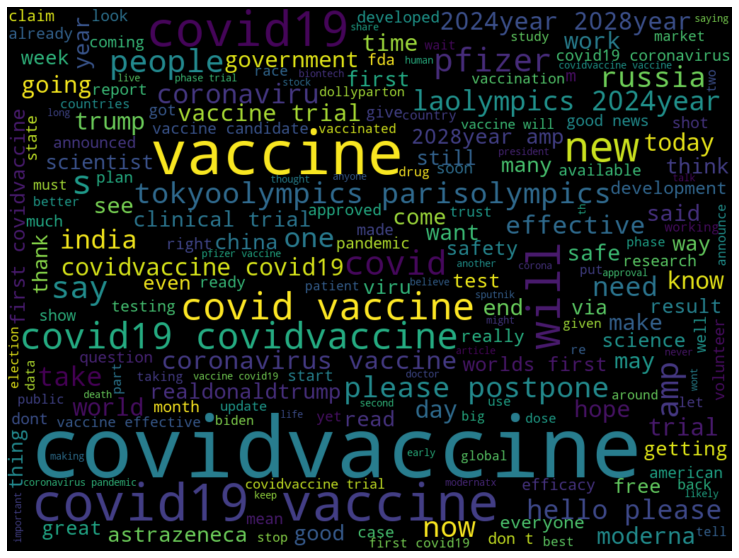

In [5]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

all_comments = ''.join([comments for comments in new_data['text']])
word_cloud = WordCloud(width=1024, height=768,random_state=21,max_font_size=120).generate(all_comments)

plt.figure(figsize=(20,10))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [6]:
def get_analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
new_data['Analysis'] = new_data['Polarity'].apply(get_analysis)

In [7]:
new_data.head()

,text,Subjectivity,Polarity,Analysis
0,australia manufacture covid19 vaccine and give...,0.4000,0.4000,Positive
1,coronavirusvaccine coronavaccine covidvaccine ...,0.9100,0.9100,Positive
2,deaths due covid19 affected countries read mor...,0.1875,0.1875,Positive
3,teamsubhashree subhashreesotwe iamrajchoco sta...,0.5000,0.5000,Positive
4,michellegrattan conversationedu this what pass...,0.0000,0.0000,Neutral


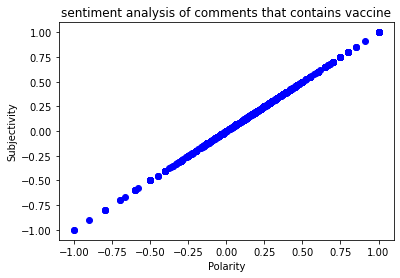

<Figure size 1440x720 with 0 Axes>

In [8]:
for i in range(0, int((new_data.shape[0])/10)):
    plt.scatter(new_data['Polarity'][i], new_data['Subjectivity'][i], color='Blue')

plt.title('sentiment analysis of comments that contains vaccine')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.figure( figsize=(20,10))
plt.show()

In [9]:
int((new_data.shape[0])/10)

2193

In [10]:
positive_comments = new_data[new_data.Analysis == 'Positive']
positive_comments = positive_comments['text']

round( (positive_comments.shape[0]/ new_data.shape[0])*100,1 )

44.3

In [11]:
negative_comments = new_data[new_data.Analysis == 'Negative']
negative_comments = negative_comments['text']

round( (negative_comments.shape[0]/ new_data.shape[0])*100,1 )

12.4

In [12]:
neutral_comments = new_data[new_data.Analysis == 'Neutral']
neutral_comments = neutral_comments['text']

round( (neutral_comments.shape[0]/ new_data.shape[0])*100,1 )

43.4

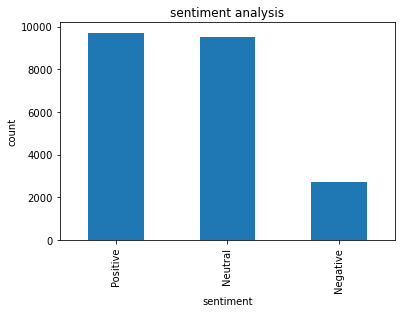

In [13]:
new_data['Analysis'].value_counts()

plt.title('sentiment analysis')
plt.xlabel('sentiment')
plt.ylabel('count')
new_data['Analysis'].value_counts().plot(kind='bar')
plt.show()


In [14]:
new_data.to_csv('preprocessed_tweetVaccine.csv')

In [15]:
new_data

,text,Subjectivity,Polarity,Analysis
0,australia manufacture covid19 vaccine and give...,0.4000,0.4000,Positive
1,coronavirusvaccine coronavaccine covidvaccine ...,0.9100,0.9100,Positive
2,deaths due covid19 affected countries read mor...,0.1875,0.1875,Positive
3,teamsubhashree subhashreesotwe iamrajchoco sta...,0.5000,0.5000,Positive
4,michellegrattan conversationedu this what pass...,0.0000,0.0000,Neutral
...,...,...,...,...
21934,covid19 covidvaccine vaccine vaccines vaccines...,0.0000,0.0000,Neutral
21935,joebiden kamalaharris thank you realdonaldtrum...,0.0000,0.0000,Neutral
21936,nanoparticles are the rise both pfizerbiontech...,0.0000,0.0000,Neutral
21937,bbc news moderna covidvaccine shows nearly pro...,0.1000,0.1000,Positive
